## Shannon entropy of image


#### Import image

In [1]:
import sys
import os
pwd = os.getcwd()
root = pwd.split("home", 1)[0]
modelling_home = root + 'home/Documents/modelling'
modelling_ephemeral = root + 'ephemeral/Documents/modelling'
modulepath = modelling_home + '/3954/modules'
sys.path.append(modulepath)
from numerical_solvers_variableboundary import *
from PIL import Image, ImageDraw
import numpy as np
from numpy import asarray
import pickle

def plot(parID,filename,results_path,L=10,mechanism='general',shape='ca',savefig_path='',x_gridpoints=8,save_figure=False):
#     filename = '2Dfinal_circuit2_variant0_boundary1_ca_generalID%r_L8_J80_T120_N23880.pkl'%parID
    final_concentration = pickle.load( open( results_path + '/' + filename, "rb" ) )
    plot_redgreen_contrast(final_concentration,L,mechanism,shape,filename,savefig_path,parID=parID,scale_factor=x_gridpoints,save_figure=save_figure)


def entropy(parID,filename,results_path,show_fig=False,L=10,mechanism='general',shape='ca',savefig_path='',x_gridpoints=8,save_figure=False):
#     filename = '2Dfinal_circuit2_variant0_boundary1_ca_generalID%r_L8_J80_T120_N23880.pkl'%parID
    final_concentration = pickle.load( open( results_path + '/' + filename, "rb" ) )

    
    if show_fig==True:
        plot(parID,filename,results_path)
    
    pixels_red,pixels_green=final_concentration[-2],final_concentration[-1]
    pixels_red[pixels_red == 0] = 0.0000000001
    pixels_green[pixels_green == 0] = 0.0000000001

    #normalise so total sum=1
    pixels_red/=np.sum(pixels_red)
    pixels_green/=np.sum(pixels_green)

    H_red=0
    H_green=0

    for counti,i in enumerate(pixels_red):
        for countj,p in enumerate(i):
            pixelH = p*np.log2(p)
            H_red -= pixelH
            
    for counti,i in enumerate(pixels_green):
        for countj,p in enumerate(i):
            pixelH = p*np.log2(p)
            H_green -= pixelH
            
    H = np.mean([H_red,H_green])
    return H_red,H_green,H


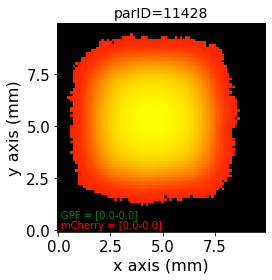

RED entropy:11.803587116689618
GREEN entropy:11.56330403322027
MEAN entropy:11.683445574954945


In [2]:
parID = 11428
filename = '2Dfinal_circuit2_variant0_boundary1_ca_generalID%r_L8_J80_T120_N23880.pkl'%parID
results_path = modelling_ephemeral + '/3954/numerical_confocal/results/simulation/1M_colony_ca/2D/full_circuit'
a = entropy(parID,filename,results_path,show_fig=True)

print('RED entropy:' + str(a[0]))
print('GREEN entropy:' + str(a[1]))
print('MEAN entropy:' + str(a[2]))

4699 (11.803732232973429, 11.803732239232398, 11.803732236102913)


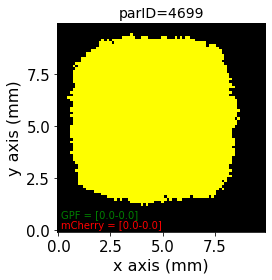

11428 (11.803587116689618, 11.56330403322027, 11.683445574954945)


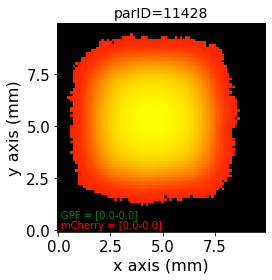

16291 (11.620740761295313, 10.685365799437367, 11.15305328036634)


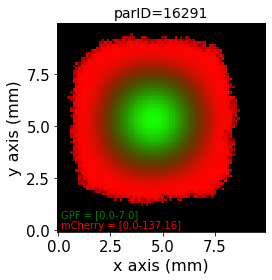

20230 (10.538909418502714, 11.386779163520098, 10.962844291011406)


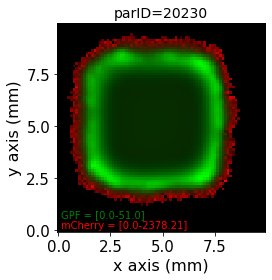

20319 (11.525552233081907, 10.275253358859466, 10.900402795970686)


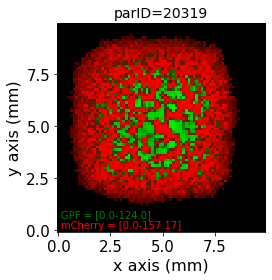

9740 (9.375207515539255, 11.428951985958836, 10.402079750749046)


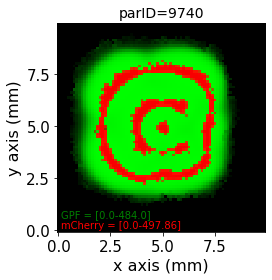

4781 (8.383874821155647, 11.732094840625004, 10.057984830890327)


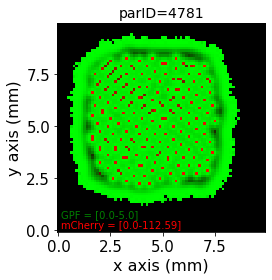

In [3]:
results_path = modelling_ephemeral + '/3954/numerical_confocal/results/simulation/1M_colony_ca/2D/full_circuit'
parID_list = [11428,4699,9740,16291,4781,20319,20230]
entropy_dict = {}
for parID in parID_list:
    filename = '2Dfinal_circuit2_variant0_boundary1_ca_generalID%r_L8_J80_T120_N23880.pkl'%parID
    entropy_dict[parID]=entropy(parID,filename,results_path)
entropy_dict = sorted(entropy_dict.items(), key=lambda x: x[1][2],reverse=True)


for keys,items in entropy_dict:
    print (keys,items)
    filename = '2Dfinal_circuit2_variant0_boundary1_ca_generalID%r_L8_J80_T120_N23880.pkl'%keys


    plot(keys,filename,results_path)



4699 (11.803732232973429, 11.803732239232398, 11.803732236102913)


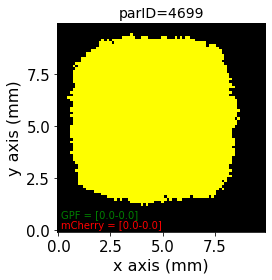

11428 (11.803587116689618, 11.56330403322027, 11.683445574954945)


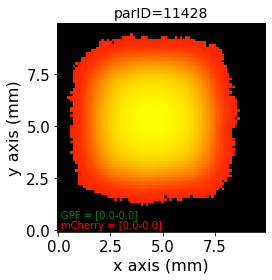

16291 (11.620740761295313, 10.685365799437367, 11.15305328036634)


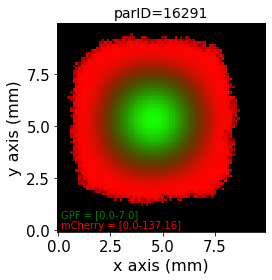

20319 (11.525552233081907, 10.275253358859466, 10.900402795970686)


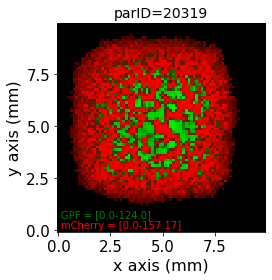

9740 (9.375207515539255, 11.428951985958836, 10.402079750749046)


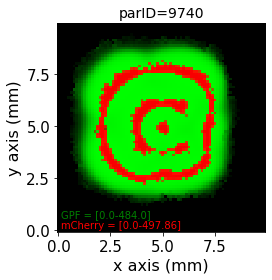

11141 (8.868839639290275, 11.32052420919868, 10.094681924244478)


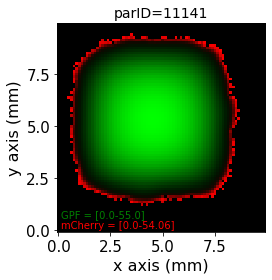

4781 (8.383874821155647, 11.732094840625004, 10.057984830890327)


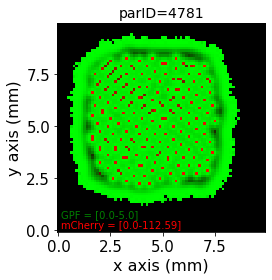

13482 (11.567784667599797, 1.7601891140045571, 6.663986890802177)


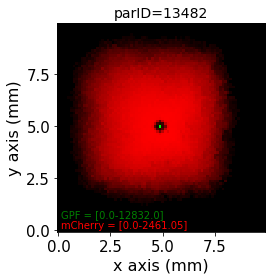

In [87]:
results_path = modelling_ephemeral + '/3954/numerical_confocal/results/simulation/1M_colony_ca/2D/full_circuit'
parID_list = [11428,4699,9740,16291,4781,13482,20319,11141]
entropy_dict = {}
for parID in parID_list:
    filename = '2Dfinal_circuit2_variant0_boundary1_ca_generalID%r_L8_J80_T120_N23880.pkl'%parID
    entropy_dict[parID]=entropy(parID,filename,results_path)
entropy_dict = sorted(entropy_dict.items(), key=lambda x: x[1][2],reverse=True)


for keys,items in entropy_dict:
    print (keys,items)
    filename = '2Dfinal_circuit2_variant0_boundary1_ca_generalID%r_L8_J80_T120_N23880.pkl'%keys


    plot(keys,filename,results_path)




## Full dataset entropy distribution

In [5]:
entropy_dict = pickle.load( open( 'entropy_ordered_dict_fulldataset.pkl', "rb" ) )

dct_red = dict((y,x[0]) for y,x in entropy_dict)
dct_green = dict((y,x[1]) for y,x in entropy_dict)
dct_mean = dict((y,x[2]) for y,x in entropy_dict)




<Figure size 432x288 with 0 Axes>

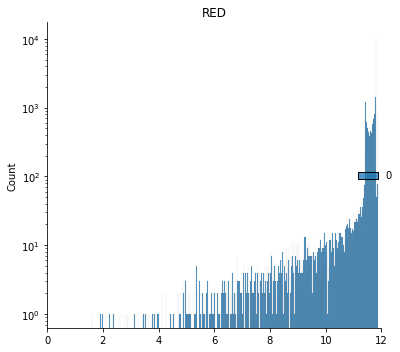

In [130]:
import seaborn as sns
plt.figure(1)
sns.displot(dct_red.values(),log_scale=(False,True))
plt.title('RED')
plt.xlim(0,12)
plt.tight_layout()
plt.savefig('redentropy_distribution_general.png')

<Figure size 432x288 with 0 Axes>

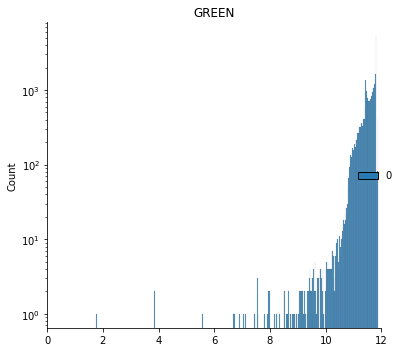

In [131]:
plt.figure(2)
sns.displot(dct_green.values(),log_scale=(False,True))
plt.xlim(0,12)

plt.title('GREEN')
plt.tight_layout()

plt.savefig('greenentropy_distribution_general.png')

<Figure size 432x288 with 0 Axes>

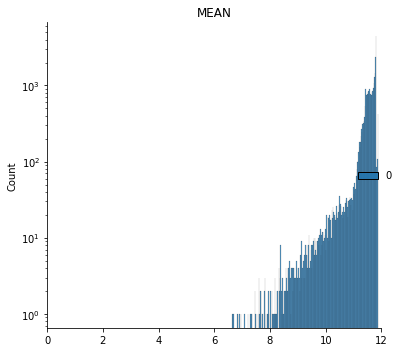

In [132]:
plt.figure(3)
sns.displot(dct_mean.values(),log_scale=(False,True))
plt.xlim(0,12)
plt.title('MEAN')
plt.tight_layout()


plt.savefig('meanentropy_distribution_general.png')

In [9]:
circuit=2
variant=0
n_parametersets = 1000000
lsa_df = pickle.load( open( modelling_home + '/3954/parameter_space_search/results/output_dataframes/lsa_df_circuit%r_variant%r_%rparametersets.pkl'%(circuit,variant,n_parametersets), 'rb' ) )



In [10]:
lsa_df['system_class'].loc[5716,0]

'turing I'

In [11]:
lsa_df['system_class'].value_counts()

simple stable           1266543
simple unstable          254878
turing I                   2689
turing I oscillatory       1263
unclassified                998
hopf                        409
no steady state             298
turing I hopf               225
turing II hopf               44
turing II                    37
Name: system_class, dtype: int64

In [12]:
parID_list = []
lsa_df_index = np.unique(lsa_df.index.get_level_values(0))
for parID in lsa_df_index:
    if str(parID) in dct_green.keys():
        parID_list.append(parID)
parID_list

[1,
 2,
 4,
 5,
 6,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 17,
 18,
 19,
 20,
 21,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 46,
 47,
 49,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 83,
 84,
 85,
 86,
 88,
 89,
 91,
 92,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 152,
 153,
 154,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 198,
 199,
 2

In [13]:
parID_systemclass_dict = {}
parID_greenentropy_dict = {}
parID_redentropy_dict = {}


for parID in parID_list:
    parID_systemclass_dict[parID] = lsa_df['system_class'].loc[parID,0]
    parID_greenentropy_dict[parID] = dct_green[str(parID)]
    parID_redentropy_dict[parID] = dct_red[str(parID)]

parID_systemclass_dict

{1: 'simple stable',
 2: 'simple unstable',
 4: 'simple stable',
 5: 'simple stable',
 6: 'simple stable',
 8: 'simple stable',
 9: 'simple stable',
 10: 'simple stable',
 11: 'simple stable',
 12: 'simple stable',
 13: 'simple stable',
 14: 'simple stable',
 15: 'simple stable',
 17: 'simple stable',
 18: 'simple stable',
 19: 'simple stable',
 20: 'simple unstable',
 21: 'simple stable',
 23: 'simple stable',
 24: 'simple unstable',
 25: 'simple stable',
 26: 'simple stable',
 27: 'simple stable',
 28: 'simple stable',
 29: 'simple stable',
 30: 'simple unstable',
 31: 'simple stable',
 32: 'simple unstable',
 33: 'simple stable',
 34: 'simple stable',
 35: 'simple stable',
 36: 'simple stable',
 37: 'simple stable',
 38: 'simple stable',
 39: 'simple stable',
 40: 'simple stable',
 41: 'simple stable',
 42: 'simple stable',
 43: 'simple stable',
 44: 'simple stable',
 46: 'simple stable',
 47: 'simple stable',
 49: 'simple stable',
 51: 'simple stable',
 52: 'simple stable',
 53: 's

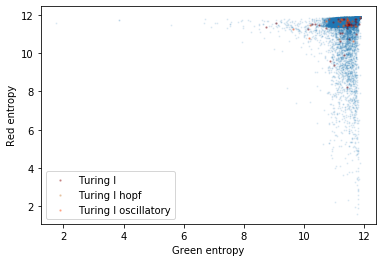

In [104]:
import pandas as pd
data = {'parID':list(parID_systemclass_dict.keys()), 'system_class':list(parID_systemclass_dict.values()), 'green_entropy' : list(parID_greenentropy_dict.values()), 'red_entropy' : list(parID_redentropy_dict.values())}
df = pd.DataFrame(data)

fig, ax = plt.subplots()

# ax.scatter(df['green_entropy'], df['red_entropy'], c=df['system_class'].map(colors),s=1,alpha=0.1)


ax.scatter(df['green_entropy'], df['red_entropy'], s=1,alpha=0.1)

ax.scatter(df['green_entropy'].loc[df['system_class'] == 'turing I'], df['red_entropy'].loc[df['system_class'] == 'turing I'], c='darkred',s=2,alpha=0.3,label='Turing I')
ax.scatter(df['green_entropy'].loc[df['system_class'] == 'turing I hopf'], df['red_entropy'].loc[df['system_class'] == 'turing I hopf'],c='peru', s=2,alpha=0.3,label='Turing I hopf')
ax.scatter(df['green_entropy'].loc[df['system_class'] == 'turing I oscillatory'], df['red_entropy'].loc[df['system_class'] == 'turing I oscillatory'],c='orangered', s=2,alpha=0.3,label='Turing I oscillatory')


plt.legend()

plt.ylabel('Red entropy')
plt.xlabel('Green entropy')

plt.savefig('redgreen_scatter.png',dpi=1000)

In [17]:
system_types = np.unique(df['system_class'])

array(['hopf', 'no steady state', 'simple stable', 'simple unstable',
       'turing I', 'turing I hopf', 'turing I oscillatory', 'turing II',
       'turing II hopf', 'unclassified'], dtype=object)

In [170]:
len(list(parID_greenentropy_dict.values()))

28124

<Figure size 432x288 with 0 Axes>

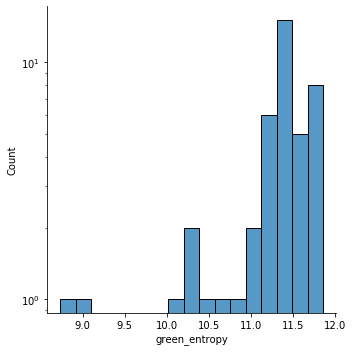

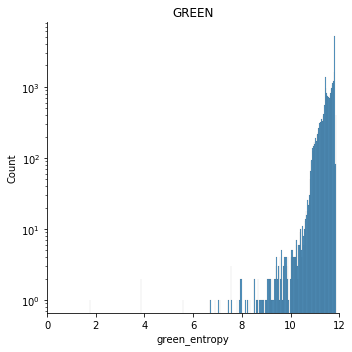

In [121]:
plt.figure(2)

sns.displot(df['green_entropy'].loc[df['system_class'] == 'turing I'],log_scale=(False,True))
sns.displot(df['green_entropy'],log_scale=(False,True))

plt.xlim(0,12)
plt.title('GREEN')
plt.tight_layout()
plt.show()

# plt.savefig('greenentropy_distribution_general.png')